In [11]:
import pandas as pd



In [13]:
data = pd.read_csv('C:\\Users\\Abdilala\\Documents\\GitHub\\Data-weak4\\Data\\rossmann-store-sales\\train.csv', low_memory=False)

In [14]:
print("Column names and indices:")
for idx, col in enumerate(data.columns):
    print(f"{idx}: {col}")

# unique values in column 7
print("Unique values in column 7:")
print(data.iloc[:, 7].unique())


Column names and indices:
0: Store
1: DayOfWeek
2: Date
3: Sales
4: Customers
5: Open
6: Promo
7: StateHoliday
8: SchoolHoliday
Unique values in column 7:
['0' 'a' 'b' 'c']


In [16]:
# Convert StateHoliday column to string
data['StateHoliday'] = data['StateHoliday'].astype(str)


In [17]:
print("Unique values in StateHoliday column after standardization:")
print(data['StateHoliday'].unique())


Unique values in StateHoliday column after standardization:
['0' 'a' 'b' 'c']


In [18]:
holiday_mapping = {
    '0': 'None',
    'a': 'Public Holiday',
    'b': 'Easter Holiday',
    'c': 'Christmas'
}

data['StateHoliday'] = data['StateHoliday'].map(holiday_mapping)


In [19]:
holiday_sales = data.groupby('StateHoliday')['Sales'].mean().reset_index()

In [20]:
print(holiday_sales)

     StateHoliday        Sales
0       Christmas   168.733171
1  Easter Holiday   214.311510
2            None  5947.483893
3  Public Holiday   290.735686


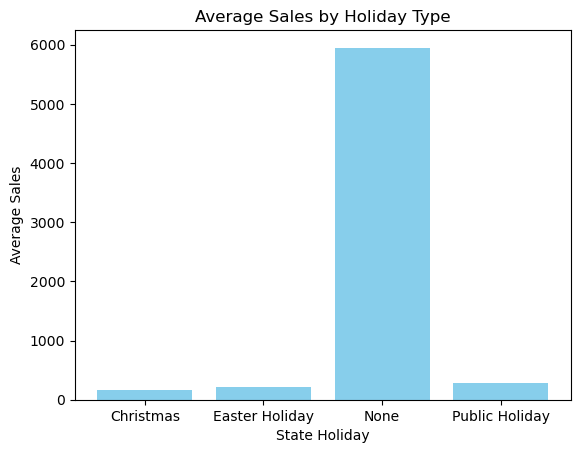

In [40]:
# Visualize sales behavior
import matplotlib.pyplot as plt
import numpy as np
plt.bar(holiday_sales['StateHoliday'], holiday_sales['Sales'], color='skyblue')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.title('Average Sales by Holiday Type')
plt.show()

In [45]:
avg_sales = data.groupby(['StateHoliday', 'Promo'])['Sales'].mean().reset_index()

In [46]:
sales_no_promo = avg_sales[avg_sales['Promo'] == 0][['StateHoliday', 'Sales']]
sales_with_promo = avg_sales[avg_sales['Promo'] == 1][['StateHoliday', 'Sales']]  

In [47]:
aligned_data = pd.merge(
    sales_no_promo.rename(columns={'Sales': 'No Promo'}),
    sales_with_promo.rename(columns={'Sales': 'With Promo'}),
    on='StateHoliday',
    how='outer'
).fillna(0)

In [48]:
holidays = aligned_data['StateHoliday']
x = np.arange(len(holidays))
width = 0.35

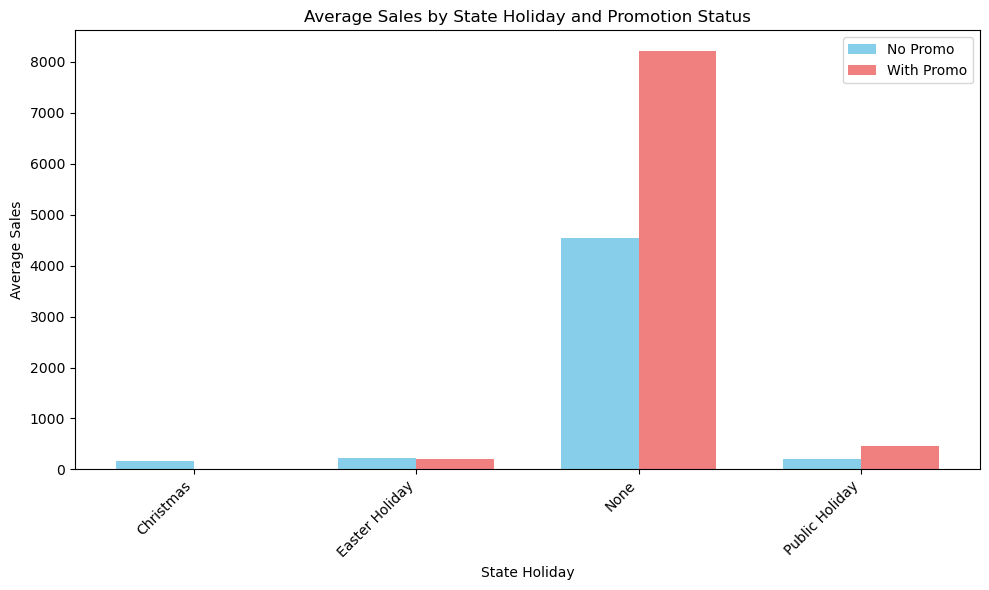

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width / 2, aligned_data['No Promo'], width, label='No Promo', color='skyblue')
ax.bar(x + width / 2, aligned_data['With Promo'], width, label='With Promo', color='lightcoral')

# Add labels and title
ax.set_xlabel('State Holiday')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales by State Holiday and Promotion Status')
ax.set_xticks(x)
ax.set_xticklabels(holidays, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [51]:
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [52]:
avg_sales = data.groupby(['StateHoliday', 'DayOfWeek', 'Promo'])['Sales'].mean().reset_index()

In [53]:
sales_no_promo = avg_sales[avg_sales['Promo'] == 0][['StateHoliday', 'DayOfWeek', 'Sales']]
sales_with_promo = avg_sales[avg_sales['Promo'] == 1][['StateHoliday', 'DayOfWeek', 'Sales']]

In [54]:
aligned_data = pd.merge(
    sales_no_promo.rename(columns={'Sales': 'No Promo'}),
    sales_with_promo.rename(columns={'Sales': 'With Promo'}),
    on=['StateHoliday', 'DayOfWeek'],
    how='outer'
).fillna(0)

In [55]:
holidays = aligned_data['StateHoliday'].unique()
x = np.arange(len(holidays))
width = 0.35

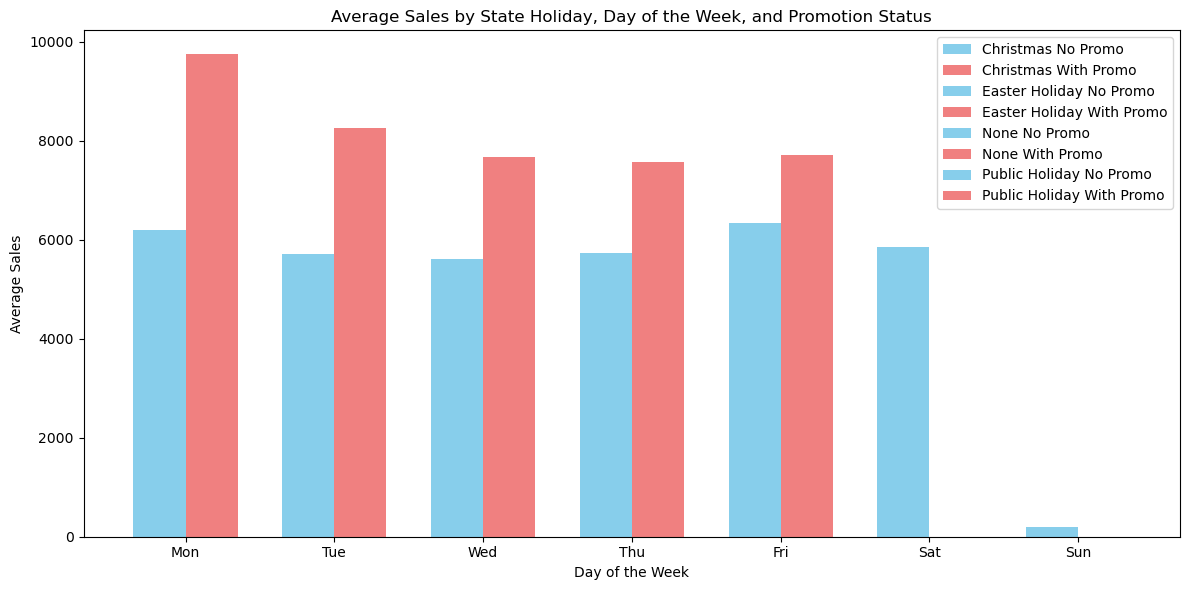

In [56]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
for i, holiday in enumerate(holidays):
    holiday_data = aligned_data[aligned_data['StateHoliday'] == holiday]
    ax.bar(holiday_data['DayOfWeek'] - width / 2, holiday_data['No Promo'], width, label=f'{holiday} No Promo', color='skyblue')
    ax.bar(holiday_data['DayOfWeek'] + width / 2, holiday_data['With Promo'], width, label=f'{holiday} With Promo', color='lightcoral')

# Add labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales by State Holiday, Day of the Week, and Promotion Status')
ax.set_xticks(np.arange(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.legend()

plt.tight_layout()
plt.show()

In [23]:
print("Column names and indices:")
for idx, col in enumerate(data.columns):
    print(f"{idx}: {col}")

# unique values in column 7
print("Unique values in column 8:")
print(data.iloc[:, 8].unique())


Column names and indices:
0: Store
1: DayOfWeek
2: Date
3: Sales
4: Customers
5: Open
6: Promo
7: StateHoliday
8: SchoolHoliday
Unique values in column 8:
[1 0]


In [24]:
school_holiday_sales = data.groupby('SchoolHoliday')['Sales'].mean().reset_index()

# Display results
print("Average sales by school holiday status:")
print(school_holiday_sales)

Average sales by school holiday status:
   SchoolHoliday        Sales
0              0  5620.979034
1              1  6476.522207


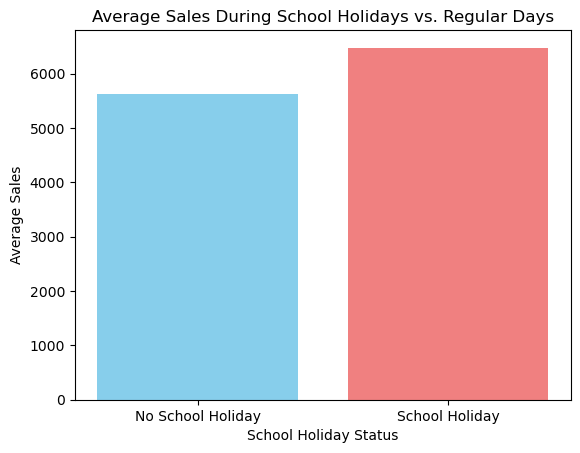

In [25]:
import matplotlib.pyplot as plt

plt.bar(
    school_holiday_sales['SchoolHoliday'],
    school_holiday_sales['Sales'],
    color=['skyblue', 'lightcoral']
)
plt.xticks([0, 1], ['No School Holiday', 'School Holiday'])
plt.xlabel('School Holiday Status')
plt.ylabel('Average Sales')
plt.title('Average Sales During School Holidays vs. Regular Days')
plt.show()

In [26]:
promo_school_sales = data.groupby(['SchoolHoliday', 'Promo'])['Sales'].mean().reset_index()
print("Average sales by school holiday and promo status:")
print(promo_school_sales)


Average sales by school holiday and promo status:
   SchoolHoliday  Promo        Sales
0              0      0  4237.208836
1              0      1  8015.661518
2              1      0  5303.505215
3              1      1  7899.810066


In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
school_holiday = promo_school_sales['SchoolHoliday']
promo_status = promo_school_sales['Promo']
sales = promo_school_sales['Sales']

In [30]:
x = np.arange(2)  
width = 0.35 

In [31]:
sales_no_promo = [sales[i] for i in range(len(sales)) if promo_status[i] == 0]
sales_with_promo = [sales[i] for i in range(len(sales)) if promo_status[i] == 1]

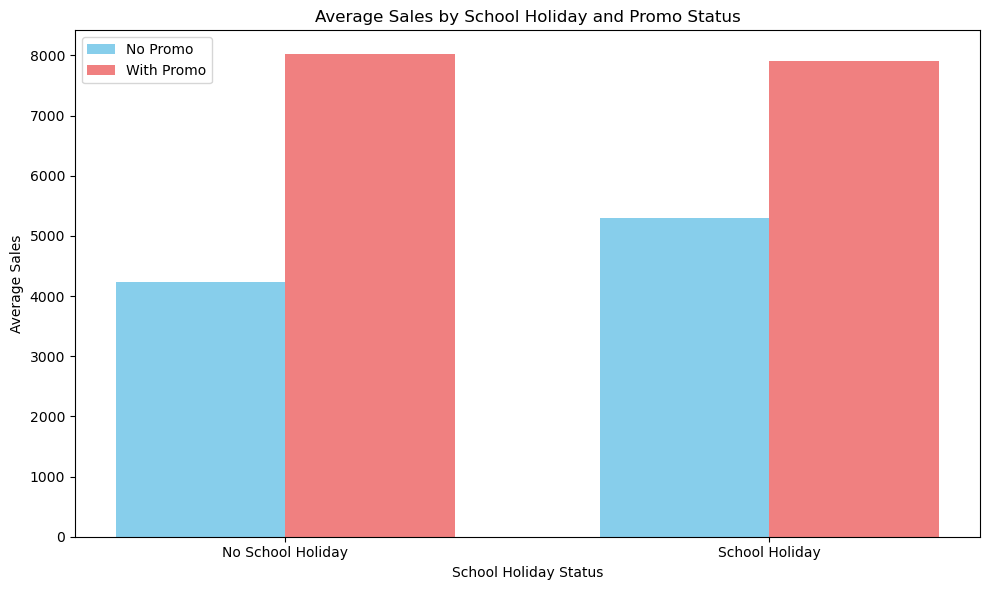

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width / 2, sales_no_promo, width, label='No Promo', color='skyblue')
bar2 = ax.bar(x + width / 2, sales_with_promo, width, label='With Promo', color='lightcoral')

# Labels and title
ax.set_xlabel('School Holiday Status')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales by School Holiday and Promo Status')
ax.set_xticks(x)
ax.set_xticklabels(['No School Holiday', 'School Holiday'])
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [27]:
weekday_school_sales = data.groupby(['SchoolHoliday', 'DayOfWeek'])['Sales'].mean().reset_index()
print("Average sales by school holiday and day of the week:")
print(weekday_school_sales)


Average sales by school holiday and day of the week:
    SchoolHoliday  DayOfWeek        Sales
0               0          1  7784.789003
1               0          2  7049.426867
2               0          3  6659.622666
3               0          4  6341.879422
4               0          5  6962.147222
5               0          6  5846.198365
6               0          7   201.022675
7               1          1  7887.857105
8               1          2  6873.561716
9               1          3  6223.340397
10              1          4  5946.055458
11              1          5  6000.689499
12              1          6  5918.682085
13              1          7   368.945301


In [33]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_no_holiday = [weekday_school_sales['Sales'][i] for i in range(7)]
sales_with_holiday = [weekday_school_sales['Sales'][i] for i in range(7, 14)]

In [34]:
x = np.arange(len(days))  
width = 0.35

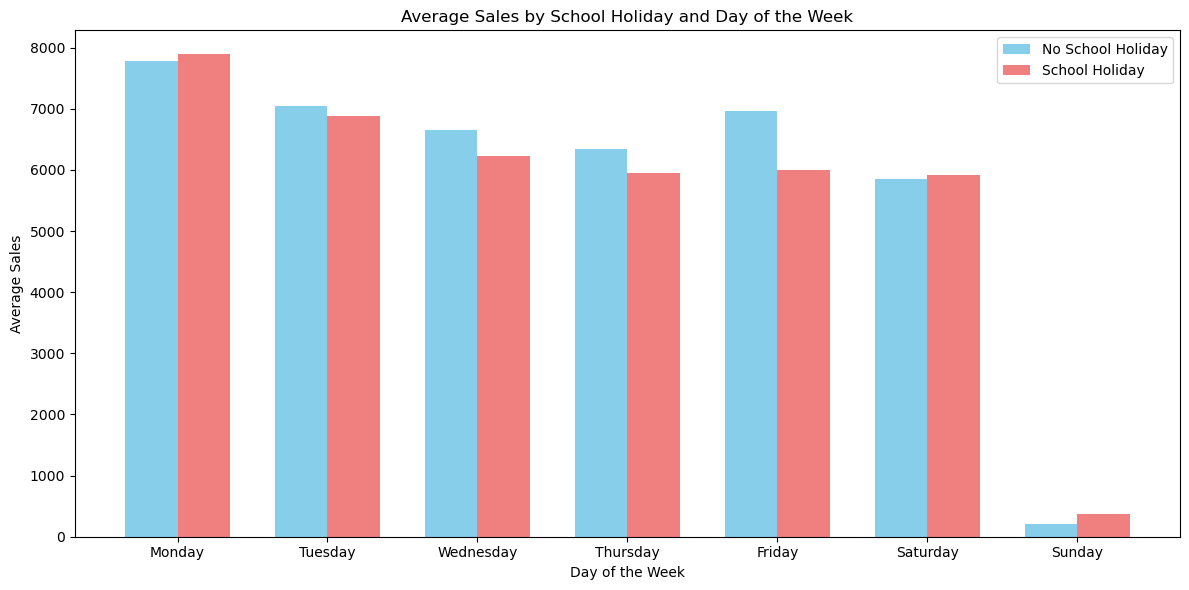

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width / 2, sales_no_holiday, width, label='No School Holiday', color='skyblue')
bar2 = ax.bar(x + width / 2, sales_with_holiday, width, label='School Holiday', color='lightcoral')

# Adding labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales by School Holiday and Day of the Week')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [50]:
column_list = data.columns.tolist()
print("List of Columns:", column_list)

List of Columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


In [4]:
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  

In [5]:
print("\nDataset shape:", data.shape)



Dataset shape: (1115, 10)


In [6]:
print("\nData types and non-null counts:")
print(data.info())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


In [7]:
print("\nSummary statistics for numerical features:")
print(data.describe())


Summary statistics for numerical features:
            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min       

In [8]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nUnique values in categorical features:")
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")


Unique values in categorical features:
StoreType: 4 unique values
Assortment: 3 unique values
PromoInterval: 3 unique values


In [9]:
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [10]:
columns_to_check = ['Store', 'StateHoliday', 'StoreType', 'Assortment']
print("\nUnique values in selected columns:")
for col in columns_to_check:
    print(f"{col}: {data[col].unique()}")


Unique values in selected columns:
Store: [   1    2    3 ... 1113 1114 1115]


KeyError: 'StateHoliday'